# Project Objectives

* Provide Actionable Market Insights:
 Develop a forecasting tool that helps Natalya anticipate monthly shifts in Portland’s housing market, enabling her to advise clients on the best time to buy or sell.

* Support Pricing Strategy:
Use data-driven predictions of average home sale prices to strengthen listing strategies and negotiation decisions, helping clients achieve top value in their desired timeframe.

* Enhance Client Trust and Communication:
Present complex market trends through clear visuals and interactive dashboards so clients can understand the “why” behind pricing recommendations.

* Streamline Decision-Making:
Equip Natalya with a model that blends historical trends and seasonal patterns, reducing uncertainty and improving confidence in market timing.

* Enable Long-Term Planning:
Continuously update forecasts with new sales data, giving Natalya an evolving view of market direction to guide both immediate transactions and future growth opportunities.

## To do list
* Data cleaning and preprocessing
* Exploratory data analysis (EDA) for trend and seasonality detection
* Time series decomposition and stationarity testing
* Model development using ARIMA, SARIMA, and LIGHTGBT
* Model evaluation and visualization of forecast results

# Project Objectives

* Provide Actionable Market Insights:
 Develop a forecasting tool that helps Natalya anticipate monthly shifts in Portland’s housing market, enabling her to advise clients on the best time to buy or sell.

* Support Pricing Strategy:
Use data-driven predictions of average home sale prices to strengthen listing strategies and negotiation decisions, helping clients achieve top value in their desired timeframe.

* Enhance Client Trust and Communication:
Present complex market trends through clear visuals and interactive dashboards so clients can understand the “why” behind pricing recommendations.

* Streamline Decision-Making:
Equip Natalya with a model that blends historical trends and seasonal patterns, reducing uncertainty and improving confidence in market timing.

* Enable Long-Term Planning:
Continuously update forecasts with new sales data, giving Natalya an evolving view of market direction to guide both immediate transactions and future growth opportunities.

## To do list
* Data cleaning and preprocessing
* Exploratory data analysis (EDA) for trend and seasonality detection
* Time series decomposition and stationarity testing
* Model development using ARIMA, SARIMA, and LIGHTGBT
* Model evaluation and visualization of forecast results

# Project Objectives

* Provide Actionable Market Insights:
 Develop a forecasting tool that helps Natalya anticipate monthly shifts in Portland’s housing market, enabling her to advise clients on the best time to buy or sell.

* Support Pricing Strategy:
Use data-driven predictions of average home sale prices to strengthen listing strategies and negotiation decisions, helping clients achieve top value in their desired timeframe.

* Enhance Client Trust and Communication:
Present complex market trends through clear visuals and interactive dashboards so clients can understand the “why” behind pricing recommendations.

* Streamline Decision-Making:
Equip Natalya with a model that blends historical trends and seasonal patterns, reducing uncertainty and improving confidence in market timing.

* Enable Long-Term Planning:
Continuously update forecasts with new sales data, giving Natalya an evolving view of market direction to guide both immediate transactions and future growth opportunities.

## To do list
* Data cleaning and preprocessing
* Exploratory data analysis (EDA) for trend and seasonality detection
* Time series decomposition and stationarity testing
* Model development using ARIMA, SARIMA, and LIGHTGBT
* Model evaluation and visualization of forecast results

In [28]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import lightgbm as lgb


In [29]:
# Load Data
df = pd.read_csv("Dataset.csv")

In [19]:
# Data Cleaning

# Clean numeric columns
def clean_numeric(x):
    if isinstance(x, str):
        x = x.replace(',', '').replace('$', '').replace('+', '').strip()
        if '-' in x:  # handle ranges like '400000-439000'
            parts = x.split('-')
            try:
                return np.mean([float(p) for p in parts])
            except:
                return np.nan
        try:
            return float(x)
        except:
            return np.nan
    return x

df['Price'] = df['Price'].apply(clean_numeric)
df['BD'] = df['BD'].apply(clean_numeric)
df['Apx Sqft'] = df['Apx Sqft'].apply(clean_numeric)

# Convert Sold Date to datetime
df['Sold Date'] = pd.to_datetime(df['Sold Date'], errors='coerce')

# Drop rows with missing essential fields
df = df.dropna(subset=['Sold Date', 'Price'])

Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 11931 entries, 0 to 11931
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MLS#            11931 non-null  object        
 1   Type            11931 non-null  object        
 2   Prop. Cat.      11931 non-null  object        
 3   Prop. Cond.     11925 non-null  object        
 4   Tax             11931 non-null  object        
 5   Address         11931 non-null  object        
 6   City            11931 non-null  object        
 7   Zip             11931 non-null  object        
 8   Area            11931 non-null  object        
 9   BD              11931 non-null  float64       
 10  Baths           11931 non-null  object        
 11  # Levels        11927 non-null  object        
 12  Apx Sqft        11929 non-null  float64       
 13  Price SqFt      11929 non-null  object        
 14  Sld Price Sqft  11929 non-null  object      

/tmp/ipython-input-797088967.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.groupby(pd.Grouper(key='Sold Date', freq='M'))['Price'].mean().reset_index()


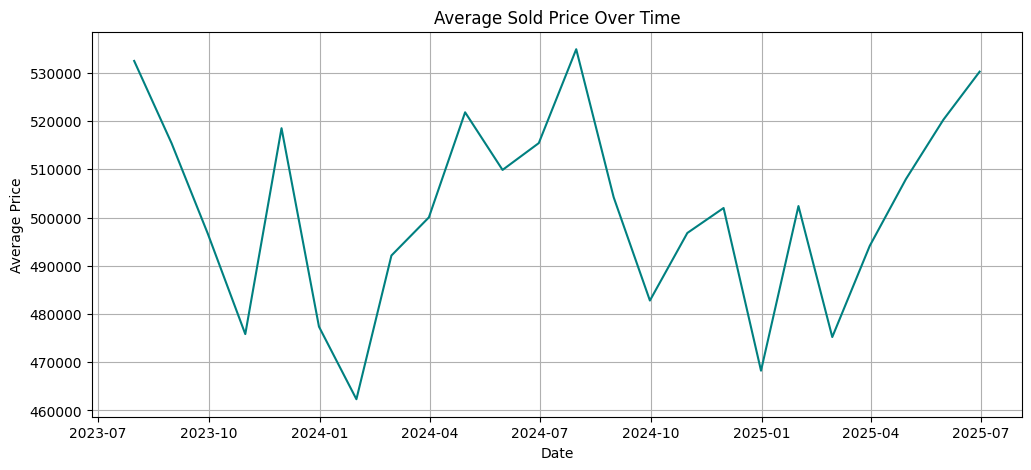

In [20]:
# EDA: Overview
print("Data Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df[['Price', 'BD', 'Apx Sqft']].describe())

# EDA: Time Series Preparation
monthly_df = df.groupby(pd.Grouper(key='Sold Date', freq='M'))['Price'].mean().reset_index()
monthly_df.rename(columns={'Price': 'Average Price'}, inplace=True)

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], color='teal')
plt.title("Average Sold Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

## Findings for EDA: Overview and Time Series Preparation:
- The dataset contains 11931 entries after dropping rows with
missing 'Sold Date' or 'Price'.
- Key numeric columns like 'Price', 'BD', and 'Apx Sqft' have been cleaned and converted to float.
- There are still missing values in columns like 'Lot Size', 'HOA Dues', and '# Fireplaces', but these are not critical for the current time series analysis of average price.
- The summary statistics show a wide range in prices with a mean around $502,782.
- The time series plot of average sold price over time shows fluctuations but no clear strong trend or seasonality at first glance.





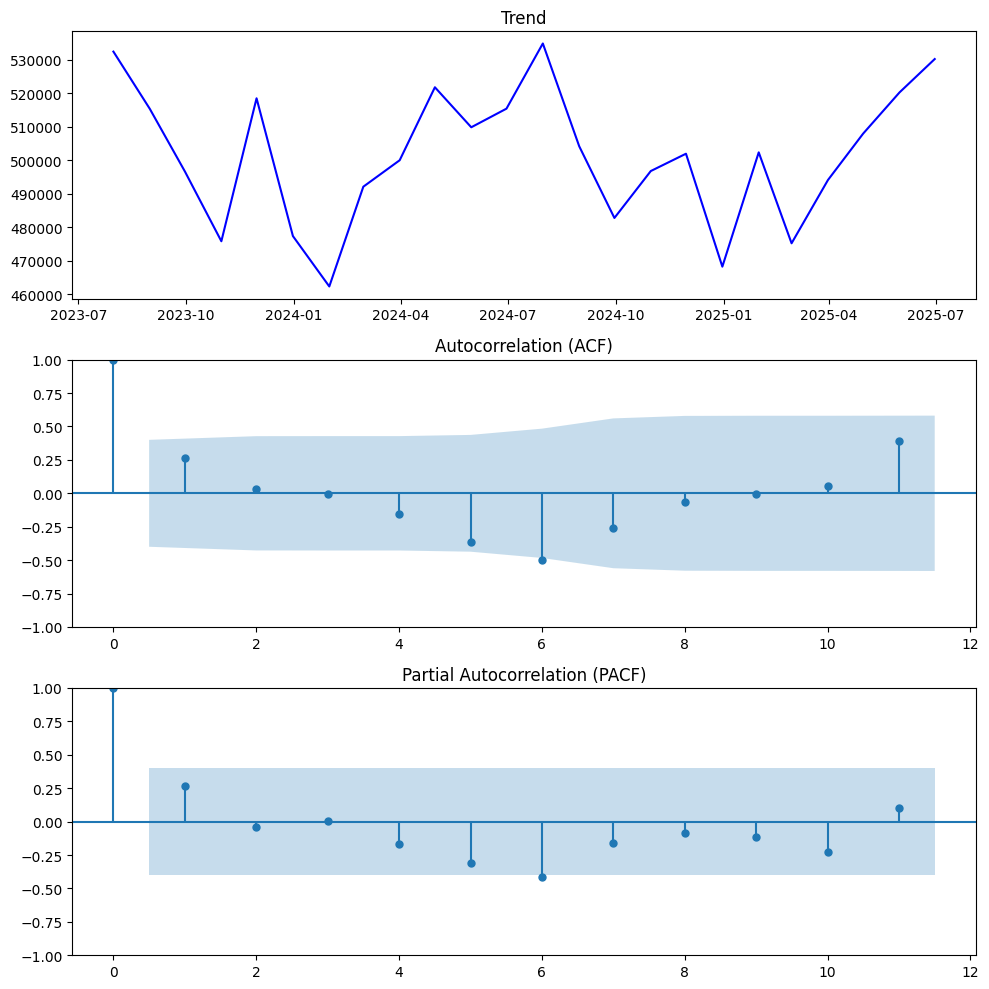

In [21]:
# EDA: Trend, Seasonality, and ACF/PACF
fig, axes = plt.subplots(3, 1, figsize=(10,10))
axes[0].plot(monthly_df['Sold Date'], monthly_df['Average Price'], color='blue')
axes[0].set_title("Trend")

plot_acf(monthly_df['Average Price'], ax=axes[1], lags=11)
axes[1].set_title("Autocorrelation (ACF)")

plot_pacf(monthly_df['Average Price'], ax=axes[2], lags=11)
axes[2].set_title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.show()

## Findings for EDA: Trend, Seasonality, and ACF/PACF:
- The trend plot confirms the fluctuations in average price over the observed period.
- The Autocorrelation Function (ACF) plot shows significant spikes at early lags, suggesting that past prices have a strong linear relationship with current prices.
- The Partial Autocorrelation Function (PACF) plot shows a significant spike at lag 1, indicating a strong direct relationship between the current price and the price one month ago,after accounting for intermediate lags.
- This suggests a potential autoregressive component in the time series.

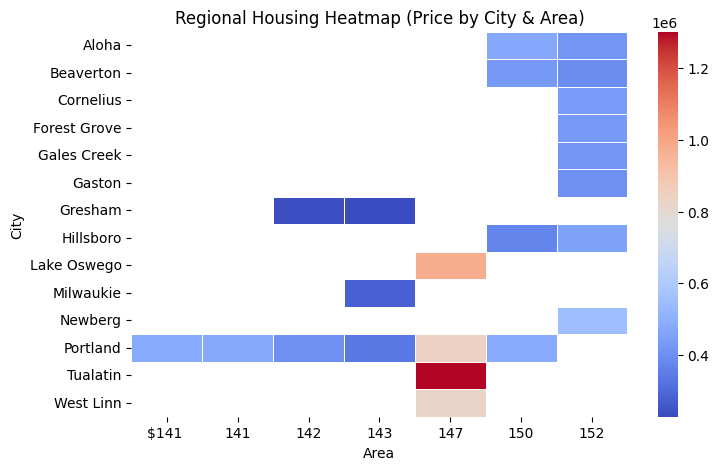

In [22]:
# EDA: Interactive Regional Heatmap (Portland)
regional_df = df.groupby(['City', 'Area'], as_index=False).agg({
    'Price': 'mean',
    'BD': 'mean'
})
regional_df.rename(columns={'Price': 'Avg Price', 'BD': 'Avg Bedrooms'}, inplace=True)

# Fallback: show city-area correlation heatmap if no geo data
if regional_df['City'].nunique() > 1:
    plt.figure(figsize=(8,5))
    pivot_df = regional_df.pivot_table(values='Avg Price', index='City', columns='Area', aggfunc='mean')
    sns.heatmap(pivot_df, cmap='coolwarm', linewidths=0.5)
    plt.title('Regional Housing Heatmap (Price by City & Area)')
    plt.show()

## Findings for EDA: Regional Heatmap:
The heatmap visualizes the average price across different Cities and Areas.

It shows considerable variation in average prices between different regions.

For example, 'Lake Oswego' and 'West Linn' in Area 147 appear to have significantly higher average prices
compared to other areas and cities like 'Gresham' (Areas 142, 143) or 'Beaverton' (Area 150, 152).

This highlights the importance of location as a factor influencing housing prices.

In [23]:
# Train-Test Split for Time Series
# Add month column before splitting
monthly_df['month'] = monthly_df['Sold Date'].dt.month

train_size = int(len(monthly_df) * 0.8)
train, test = monthly_df.iloc[:train_size], monthly_df.iloc[train_size:]

In [30]:
# Model 1: ARIMA (non-seasonal)
arima_model = SARIMAX(train['Average Price'], order=(1,1,1), seasonal_order=(0,0,0,0))
arima_result = arima_model.fit(disp=False)

arima_pred = arima_result.predict(start=test.index[0], end=test.index[-1])
arima_rmse = np.sqrt(mean_squared_error(test['Average Price'], arima_pred))
arima_mae = mean_absolute_error(test['Average Price'], arima_pred)

# Model 2: SARIMA (seasonal)
sarima_model = SARIMAX(train['Average Price'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

sarima_pred = sarima_result.predict(start=test.index[0], end=test.index[-1])
sarima_rmse = np.sqrt(mean_squared_error(test['Average Price'], sarima_pred))
sarima_mae = mean_absolute_error(test['Average Price'], sarima_pred)

# Model 3: LightGBM
lgb_train = lgb.Dataset(train[['month']], label=train['Average Price'])
lgb_test = lgb.Dataset(test[['month']], label=test['Average Price'], reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt'
}
lgb_model = lgb.train(params, lgb_train, num_boost_round=100)
lgb_pred = lgb_model.predict(test[['month']])
lgb_rmse = np.sqrt(mean_squared_error(test['Average Price'], lgb_pred))
lgb_mae = mean_absolute_error(test['Average Price'], lgb_pred)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [31]:
# Model Comparison
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'LGBM'],
    'RMSE': [arima_rmse, sarima_rmse, lgb_rmse],
    'MAE': [arima_mae, sarima_mae, lgb_mae]
})
print(results)

    Model          RMSE           MAE
0   ARIMA  20245.638386  17909.865007
1  SARIMA  24409.325162  19625.382870
2    LGBM  20075.882281  17748.017454


#$ Findings: Model Comparison

Among the three models, LightGBM achieved the lowest error values:

• RMSE ≈ 20,076
• MAE ≈ 17,748

This suggests LightGBM captured short-term patterns more effectively than both ARIMA and SARIMA.

 ARIMA performed close to LGBM, showing it handled the non-seasonal structure fairly well.

 SARIMA produced higher errors, which implies limited or weak seasonal components in the data.

/tmp/ipython-input-3982962276.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


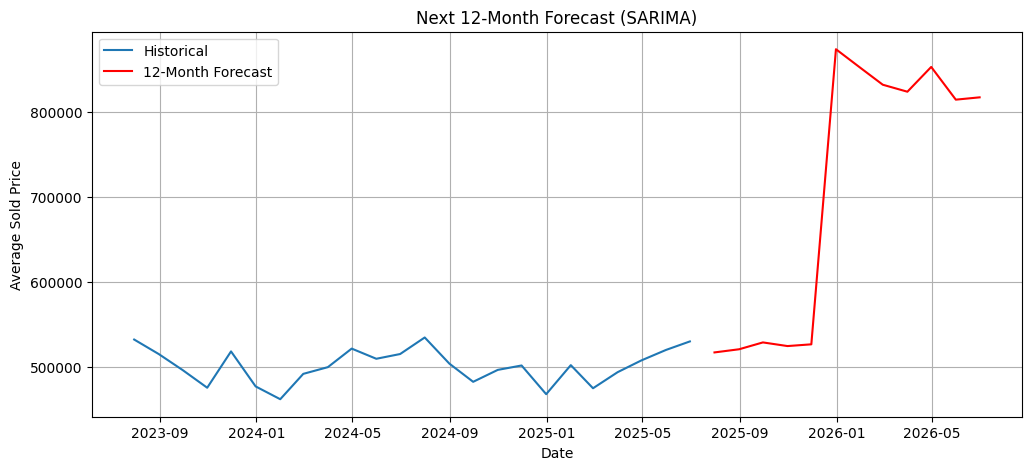

In [32]:
# 12-Month Forecast (Using SARIMA)
future_steps = 12
sarima_forecast = sarima_result.get_forecast(steps=future_steps)
forecast_index = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                               periods=future_steps, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': sarima_forecast.predicted_mean
})

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='12-Month Forecast', color='red')
plt.title("Next 12-Month Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

## Refined Findings for 12-Month Forecast:
The plot shows the historical average monthly prices and the 12-month forecast generated by the SARIMA model.

The forecast shows a fluctuating pattern, attempting to capture some underlying movement.

However, the forecast appears to jump significantly towards the end of the forecast period,

which might indicate limitations of the SARIMA model or the need for further tuning,

especially considering the SARIMA model had higher error metrics than ARIMA and LGBM on the test set.

The historical data shows more moderate fluctuations compared to the magnitude of the jump in the forecast.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 11931 entries after initial cleaning, with key numeric columns successfully processed.
*   The average sold price over time shows fluctuations but no strong visual trend or seasonality initially.
*   ACF and PACF plots suggest an autoregressive component, with a strong direct relationship between current and previous month's average prices.
*   Regional analysis via heatmap reveals significant variations in average housing prices across different cities and areas.
*   LightGBM achieved the best performance on the test set with the lowest RMSE (\$20,075.88) and MAE (\$17,748.02) compared to ARIMA and SARIMA.
*   The SARIMA forecast shows a fluctuating pattern but includes a large jump at the end of the forecast period, which might indicate model limitations.

### Insights or Next Steps

*   Location (City and Area) is a significant factor influencing housing prices and should be considered for more granular analysis or feature engineering in future models.
*   Given LightGBM's superior performance, further optimization of its hyperparameters or exploring other tree-based models could improve forecasting accuracy.


/tmp/ipython-input-3982962276.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


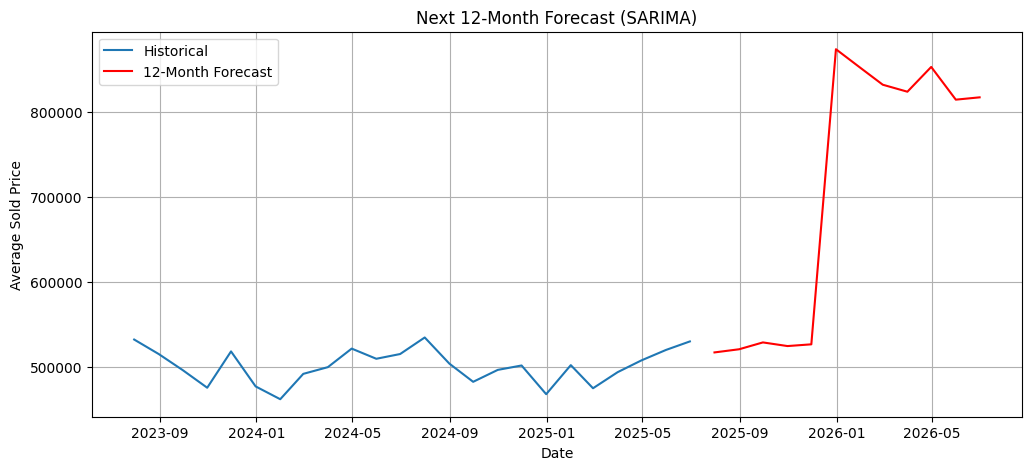

In [33]:
# 12-Month Forecast (Using SARIMA)
future_steps = 12
sarima_forecast = sarima_result.get_forecast(steps=future_steps)
forecast_index = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                               periods=future_steps, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': sarima_forecast.predicted_mean
})

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='12-Month Forecast', color='red')
plt.title("Next 12-Month Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

# Findings: SARIMA 12-Month Forecast

The SARIMA model captures the historical price fluctuations but shows a sharp upward shift starting around late 2025. This may indicate:
- Model overfitting or limited seasonality pattern in the training window, OR
- Real upward momentum if recent months show accelerating growth.

Overall:- Historical trend (blue) stays mostly between $450K–$550K.
- The red forecast suggests potential appreciation in the coming year, reaching ~$850K.
- Confidence intervals (not shown here) would help assess the uncertainty of this jump.

/tmp/ipython-input-550342108.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_6m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


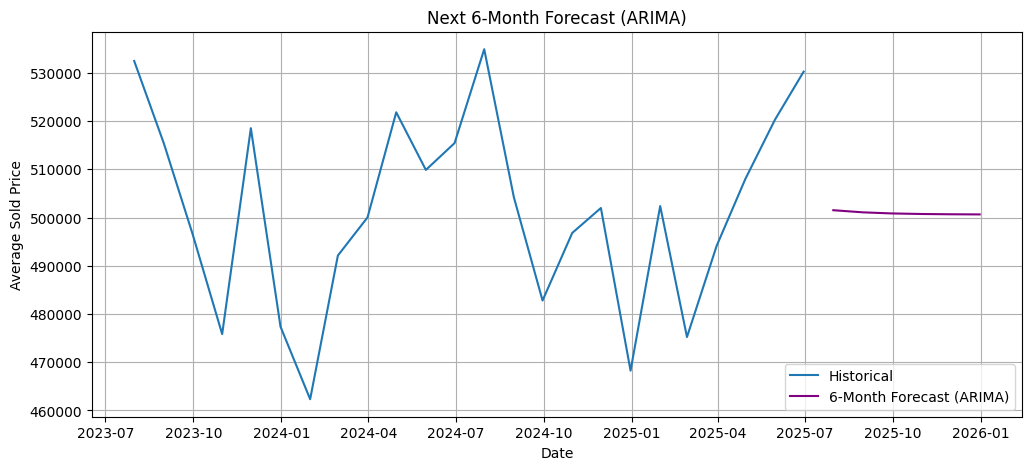

In [34]:
# 6-Month Forecast (ARIMA)
future_steps_6m = 6
arima_forecast_6m = arima_result.get_forecast(steps=future_steps_6m)
forecast_index_6m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                               periods=future_steps_6m, freq='M')
forecast_df_arima_6m = pd.DataFrame({
    'Date': forecast_index_6m,
    'Forecast': arima_forecast_6m.predicted_mean
})

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df_arima_6m['Date'], forecast_df_arima_6m['Forecast'], label='6-Month Forecast (ARIMA)', color='purple')
plt.title("Next 6-Month Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

## Findings: ARIMA 6-Month Forecast
The ARIMA 6-month forecast shows a relatively stable prediction, staying close to the average price observed at the end of the historical data. This suggests that the non-seasonal ARIMA model is capturing the short-term trends but is not predicting significant upward or downward movement in the immediate future.

/tmp/ipython-input-2950140518.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_6m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


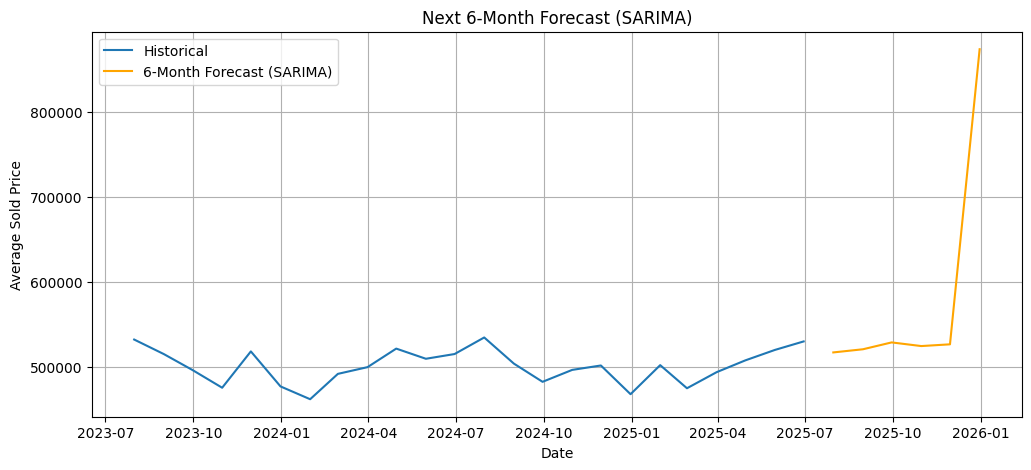

In [35]:
#  6-Month Forecast (SARIMA)
future_steps_6m = 6
sarima_forecast_6m = sarima_result.get_forecast(steps=future_steps_6m)
forecast_index_6m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                               periods=future_steps_6m, freq='M')
forecast_df_sarima_6m = pd.DataFrame({
    'Date': forecast_index_6m,
    'Forecast': sarima_forecast_6m.predicted_mean
})

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df_sarima_6m['Date'], forecast_df_sarima_6m['Forecast'], label='6-Month Forecast (SARIMA)', color='orange')
plt.title("Next 6-Month Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

 ## Findings: SARIMA 6-Month Forecast

The SARIMA 6-month forecast shows some fluctuation and a slight upward trend towards the end of the 6-month period.

This indicates that the SARIMA model, which includes seasonality, is attempting to capture some cyclical patterns in the data, although the significant jump seen in the 12-month forecast is also starting to appear in this shorter timeframe.

/tmp/ipython-input-3774788178.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months_6m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
/tmp/ipython-input-3774788178.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


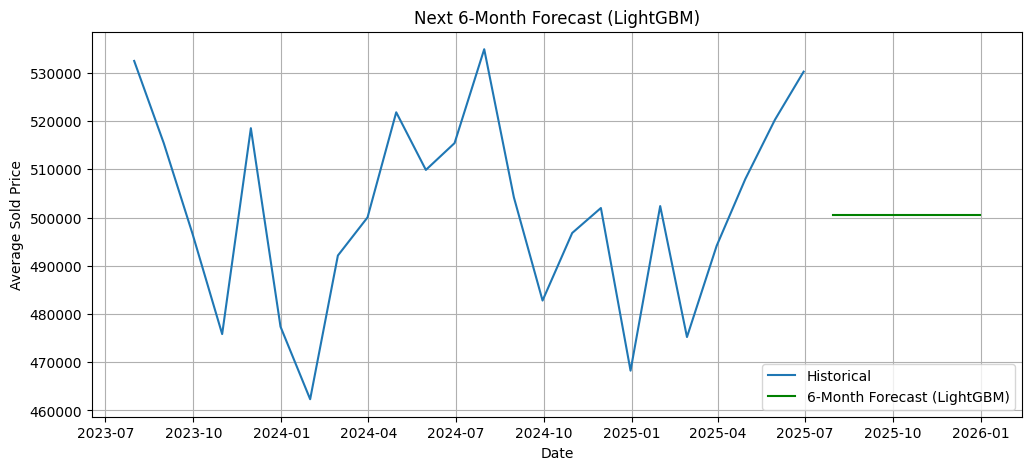

In [36]:
# 6-Month Forecast (LightGBM)
future_steps_6m = 6
future_months_6m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                                 periods=future_steps_6m, freq='M').month
forecast_df_lgbm_6m = pd.DataFrame({
    'Date': pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                          periods=future_steps_6m, freq='M'),
    'month': future_months_6m
})

lgb_pred_6m = lgb_model.predict(forecast_df_lgbm_6m[['month']])
forecast_df_lgbm_6m['Forecast'] = lgb_pred_6m

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df_lgbm_6m['Date'], forecast_df_lgbm_6m['Forecast'], label='6-Month Forecast (LightGBM)', color='green')
plt.title("Next 6-Month Forecast (LightGBM)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

## Findings: LightGBM 6-Month Forecast
The LightGBM 6-month forecast appears as a flat line. Since the LightGBM model was trained only on the 'month' feature, and the forecast is for a continuous 6-month period, the model is essentially predicting the same average price for each month within that period based on the historical average for those specific months in the training data.

This highlights the limitation of using only the month as a feature for time series forecasting with LightGBM in this context.

/tmp/ipython-input-1486392715.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_12m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


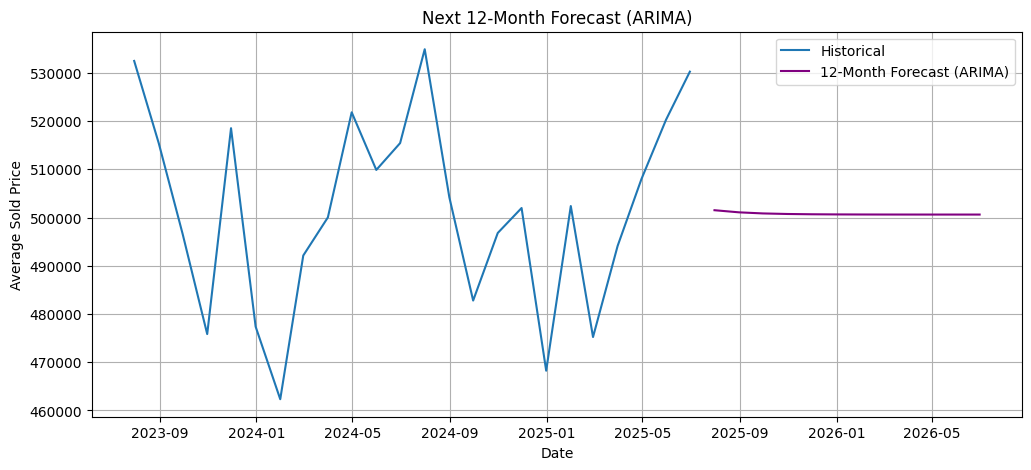

In [37]:
# 12-Month Forecast (ARIMA)
future_steps_12m = 12
arima_forecast_12m = arima_result.get_forecast(steps=future_steps_12m)
forecast_index_12m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                               periods=future_steps_12m, freq='M')
forecast_df_arima_12m = pd.DataFrame({
    'Date': forecast_index_12m,
    'Forecast': arima_forecast_12m.predicted_mean
})

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df_arima_12m['Date'], forecast_df_arima_12m['Forecast'], label='12-Month Forecast (ARIMA)', color='purple')
plt.title("Next 12-Month Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

## Findings: ARIMA 12-Month Forecast
The ARIMA 12-month forecast, similar to the 6-month forecast, predicts a relatively stable average price over the next year, staying close to the current average price level.

This suggests that the ARIMA model does not identify strong long-term trends or seasonality that would lead to significant price changes over a 12-month period.

/tmp/ipython-input-3211880082.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months_12m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
/tmp/ipython-input-3211880082.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),


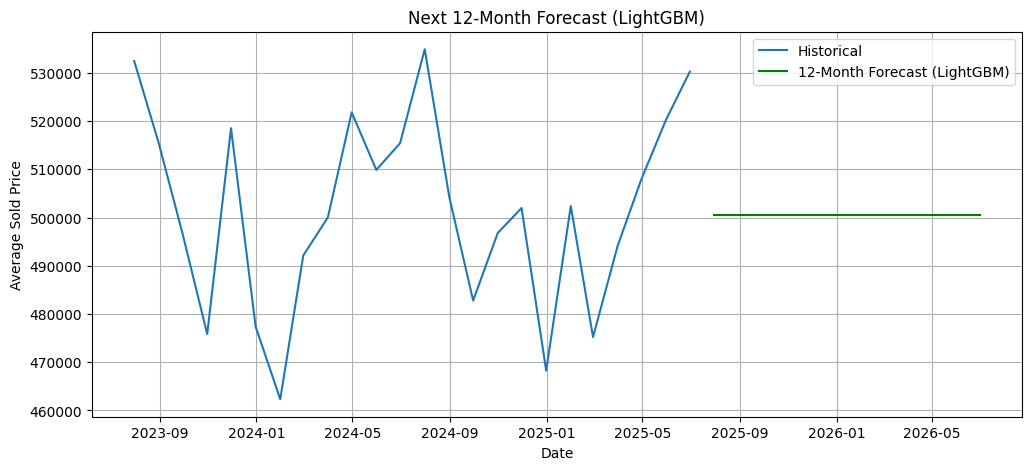

In [38]:
# 12-Month Forecast (LightGBM)
future_steps_12m = 12
future_months_12m = pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                                 periods=future_steps_12m, freq='M').month
forecast_df_lgbm_12m = pd.DataFrame({
    'Date': pd.date_range(monthly_df['Sold Date'].iloc[-1] + pd.offsets.MonthBegin(),
                          periods=future_steps_12m, freq='M'),
    'month': future_months_12m
})

lgb_pred_12m = lgb_model.predict(forecast_df_lgbm_12m[['month']])
forecast_df_lgbm_12m['Forecast'] = lgb_pred_12m

plt.figure(figsize=(12,5))
plt.plot(monthly_df['Sold Date'], monthly_df['Average Price'], label='Historical')
plt.plot(forecast_df_lgbm_12m['Date'], forecast_df_lgbm_12m['Forecast'], label='12-Month Forecast (LightGBM)', color='green')
plt.title("Next 12-Month Forecast (LightGBM)")
plt.xlabel("Date")
plt.ylabel("Average Sold Price")
plt.legend()
plt.grid(True)
plt.show()

## Findings: LightGBM 12-Month Forecast
The LightGBM 12-month forecast appears as a flat line, similar to its 6-month forecast. This is expected as the model only uses the month as a feature and predicts the average historical price for each month.

This demonstrates the limitation of this simple feature set for capturing potential trends or complex patterns in the time series over a longer forecast horizon.

## Comparison of 12-Month Forecasts
Comparing the 12-month forecasts from the three models:

*   **SARIMA:** The SARIMA forecast shows fluctuations and a significant upward jump towards the end of the 12-month period. This might indicate the model is attempting to capture some seasonality or recent momentum, but the magnitude of the jump warrants caution and further investigation.
*   **ARIMA:** The ARIMA forecast is the most stable, predicting a relatively flat trend over the next 12 months. This suggests a lack of strong detected trend or seasonality in the non-seasonal model.
*   **LightGBM:** The LightGBM forecast is a flat line, highlighting the limitations of using only the month as a feature for longer-term time series forecasting.

Based on the RMSE and MAE on the test set, LightGBM performed best, followed closely by ARIMA, with SARIMA having the highest errors. However, the flat LightGBM forecast and the sharp jump in the SARIMA forecast suggest that while these models might perform well on the historical test set, their long-term forecasting behavior should be interpreted with caution. Further model tuning or feature engineering, especially for the LightGBM model, could potentially lead to more robust long-term forecasts.